In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown 1eXxq1vkhAm1MBascNXaW7nnuKj9UD_j5

Downloading...
From: https://drive.google.com/uc?id=1eXxq1vkhAm1MBascNXaW7nnuKj9UD_j5
To: /content/test_img.png
100% 481k/481k [00:00<00:00, 67.3MB/s]


In [9]:

image = cv2.imread("test_img.png", cv2.IMREAD_GRAYSCALE)

height, width = image.shape

block_size = 10

heatmap = np.zeros((height, width))

for i in range(0, height, block_size):
    for j in range(0, width, block_size):
        block = image[i:i+block_size, j:j+block_size]
        histogram = cv2.calcHist([block], [0], None, [256], [0, 256])
        histogram /= histogram.sum()
        entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))
        heatmap[i:i+block_size, j:j+block_size] = entropy


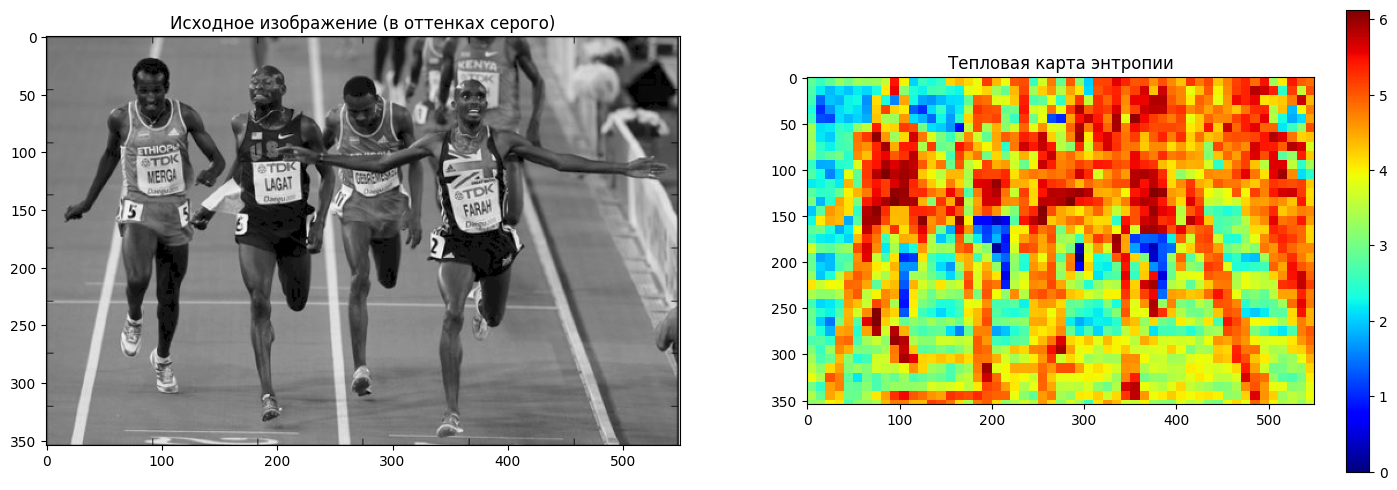

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.imshow(image , cmap='gray')
plt.title('Исходное изображение (в оттенках серого)')

plt.subplot(1,2,2)

plt.imshow(heatmap, cmap='jet', interpolation='nearest')
plt.title('Тепловая карта энтропии')
plt.colorbar()

plt.show()